In [113]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [114]:
#display two decimal places
pd.options.display.float_format = '{:.2f}'.format

In [115]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [116]:
df = pd.read_csv(r'C:\Users\abrahamp\OneDrive - Hewlett Packard Enterprise\Documents\Personal Stuff\Class Notes\Data Science Course\Python for Data Science\AirBnB\AB_NYC_2019.csv')
df.shape

(48895, 16)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [118]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [119]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## DROPPING UNECESSARY COLUMNS

In [120]:
df.drop(['host_name','name','reviews_per_month', 'last_review'],axis =1, inplace =True)
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,6,365
1,2595,2845,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2,355
2,3647,4632,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,1,194
4,5022,7192,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,1,0


## DROPPING ROWS

In [121]:
df[df['price'] <=0]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
23161,18750597,8993084,Brooklyn,Bedford-Stuyvesant,40.69,-73.95,Private room,0,4,1,4,28
25433,20333471,131697576,Bronx,East Morrisania,40.83,-73.89,Private room,0,2,55,4,127
25634,20523843,15787004,Brooklyn,Bushwick,40.69,-73.92,Private room,0,2,16,5,0
25753,20608117,1641537,Brooklyn,Greenpoint,40.72,-73.94,Private room,0,2,12,2,0
25778,20624541,10132166,Brooklyn,Williamsburg,40.71,-73.95,Entire home/apt,0,5,3,1,73
25794,20639628,86327101,Brooklyn,Bedford-Stuyvesant,40.68,-73.91,Private room,0,1,93,6,176
25795,20639792,86327101,Brooklyn,Bedford-Stuyvesant,40.68,-73.91,Private room,0,1,95,6,232
25796,20639914,86327101,Brooklyn,Bedford-Stuyvesant,40.68,-73.91,Private room,0,1,95,6,222
26259,20933849,13709292,Manhattan,Murray Hill,40.75,-73.98,Entire home/apt,0,3,0,1,0
26841,21291569,101970559,Brooklyn,Bushwick,40.69,-73.91,Shared room,0,30,2,6,333


In [122]:
df = df[df['price'] > 0]
df.shape

(48884, 12)

## IDENTIFY OUTLIERS AND DROP THEM

In [123]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
# Define bounds
low = Q1 - 1.5 * IQR
up = Q3 + 1.5 * IQR
print(low)
print(up)

-90.0
334.0


<function matplotlib.pyplot.show(close=None, block=None)>

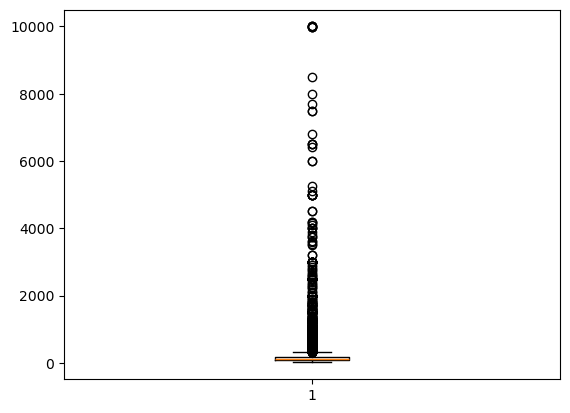

In [124]:
plt.boxplot(df['price'])
plt.show

In [125]:
(df['price'] > 334).sum()

2972

In [126]:
df = df[df['price'] < 334]
df.shape

(45907, 12)

<function matplotlib.pyplot.show(close=None, block=None)>

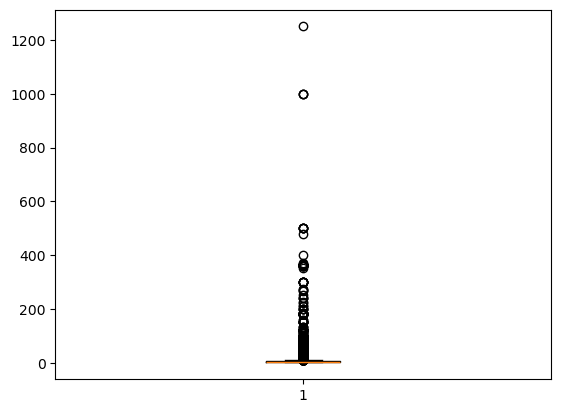

In [127]:
plt.boxplot(df['minimum_nights'])
plt.show

In [128]:
Q1 = df['minimum_nights'].quantile(0.25)
Q3 = df['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1
# Define bounds
mnlow = Q1 - 1.5 * IQR
mnup = Q3 + 1.5 * IQR
print(mnlow)
print(mnup)

-5.0
11.0


In [129]:
(df['minimum_nights'] > 11).sum()

6179

In [130]:
df = df[df['minimum_nights'] < 11]
df.shape

(39698, 12)

In [131]:
df['host_id'].nunique()

32340

## NOW FOR SOME VISUALIZATIONS

In [132]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Brooklyn         17328
Manhattan        15992
Queens            5025
Bronx             1009
Staten Island      344
Name: count, dtype: int64

<Axes: xlabel='neighbourhood_group'>

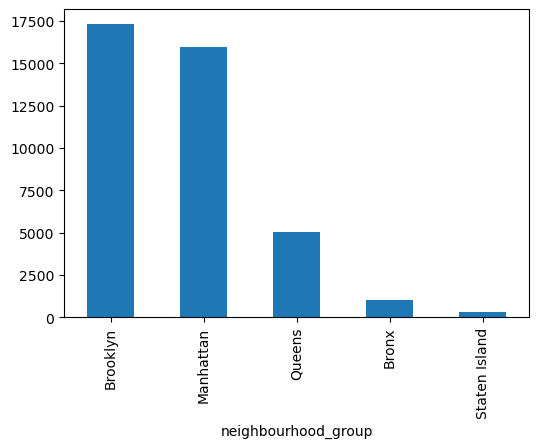

In [133]:
plt.figure(figsize=(6,4))
df['neighbourhood_group'].value_counts().plot(kind='bar')

In [134]:
df.groupby('neighbourhood_group').agg({'price': ['count', 'mean']}).sort_values(('price', 'count'), ascending=False)

price       
                     count   mean
neighbourhood_group              
Brooklyn             17328 107.10
Manhattan            15992 143.94
Queens                5025  91.12
Bronx                 1009  78.15
Staten Island          344  89.52

In [135]:
df['room_type'].value_counts()

room_type
Private room       19845
Entire home/apt    18864
Shared room          989
Name: count, dtype: int64

<Axes: xlabel='room_type'>

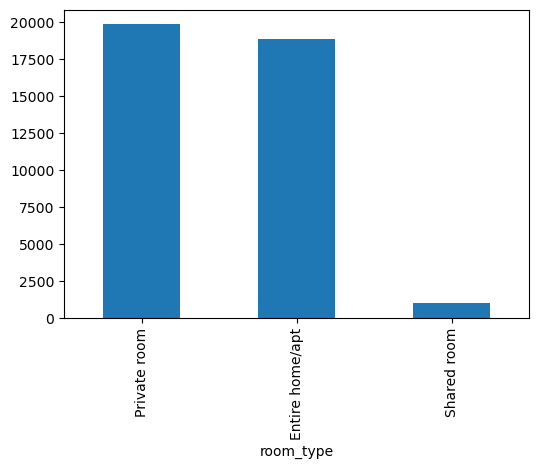

In [136]:
plt.figure(figsize=(6,4))
df['room_type'].value_counts().plot(kind='bar')

In [137]:
df.groupby('room_type').agg({'price': ['count', 'mean']}).sort_values(('price', 'count'), ascending=False)

price       
                 count   mean
room_type                    
Private room     19845  80.85
Entire home/apt  18864 162.17
Shared room        989  62.08

In [138]:
df.groupby(['neighbourhood_group', 'room_type']).agg({'price': ['count', 'mean']}).sort_values(('price', 'count'), ascending=False)

price       
                                    count   mean
neighbourhood_group room_type                   
Brooklyn            Private room     9041  71.60
Manhattan           Entire home/apt  8556 182.76
Brooklyn            Entire home/apt  7962 149.68
Manhattan           Private room     7018 100.52
Queens              Private room     2991  67.73
                    Entire home/apt  1854 133.05
Bronx               Private room      617  61.60
Manhattan           Shared room       418  78.32
Bronx               Entire home/apt   335 113.74
Brooklyn            Shared room       325  51.56
Queens              Shared room       180  47.99
Staten Island       Private room      178  62.90
                    Entire home/apt   157 121.54
Bronx               Shared room        57  48.12
Staten Island       Shared room         9  57.44

In [139]:
df.pivot_table(values='price', index=['neighbourhood_group', 'room_type'], aggfunc=['count','mean'])

count   mean
                                    price  price
neighbourhood_group room_type                   
Bronx               Entire home/apt   335 113.74
                    Private room      617  61.60
                    Shared room        57  48.12
Brooklyn            Entire home/apt  7962 149.68
                    Private room     9041  71.60
                    Shared room       325  51.56
Manhattan           Entire home/apt  8556 182.76
                    Private room     7018 100.52
                    Shared room       418  78.32
Queens              Entire home/apt  1854 133.05
                    Private room     2991  67.73
                    Shared room       180  47.99
Staten Island       Entire home/apt   157 121.54
                    Private room      178  62.90
                    Shared room         9  57.44

In [140]:
df.pivot_table(values='price', index=['neighbourhood_group', 'room_type'], aggfunc=['count','mean','median','std'])

count   mean median   std
                                    price  price  price price
neighbourhood_group room_type                                
Bronx               Entire home/apt   335 113.74 100.00 52.93
                    Private room      617  61.60  55.00 32.30
                    Shared room        57  48.12  40.00 30.75
Brooklyn            Entire home/apt  7962 149.68 140.00 58.66
                    Private room     9041  71.60  65.00 33.23
                    Shared room       325  51.56  38.00 41.30
Manhattan           Entire home/apt  8556 182.76 176.00 61.59
                    Private room     7018 100.52  90.00 48.72
                    Shared room       418  78.32  69.00 45.34
Queens              Entire home/apt  1854 133.05 120.00 58.78
                    Private room     2991  67.73  60.00 30.94
                    Shared room       180  47.99  37.50 35.03
Staten Island       Entire home/apt   157 121.54 100.00 61.33
                    Private room      178  62.90  52.00 36.87
                    Shared room         9  57.44  30.00 45.12

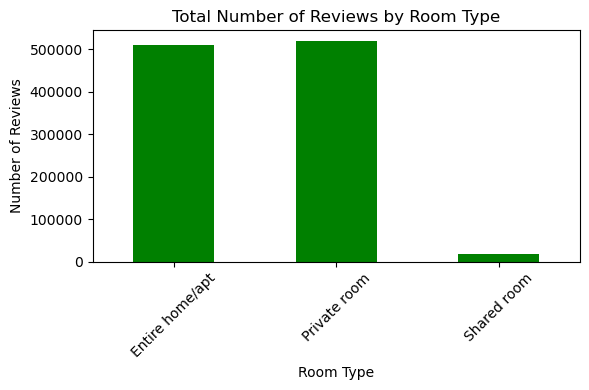

In [162]:
room_reviews = df.groupby('room_type')['number_of_reviews'].sum()
room_reviews.plot(kind='bar', color='green', figsize=(6,4))

plt.xlabel('Room Type')
plt.ylabel('Number of Reviews')
plt.title('Total Number of Reviews by Room Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

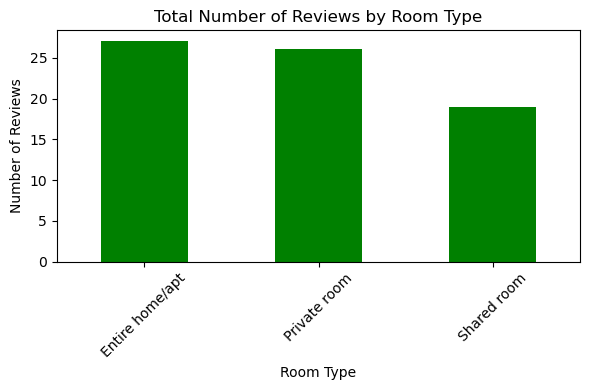

In [165]:
room_reviews = df.groupby('room_type')['number_of_reviews'].mean()
room_reviews.plot(kind='bar', color='green', figsize=(6,4))

plt.xlabel('Room Type')
plt.ylabel('Number of Reviews')
plt.title('Total Number of Reviews by Room Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

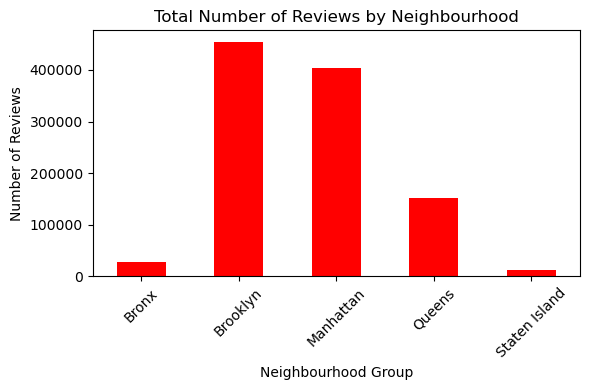

In [163]:
neigh_reviews = df.groupby('neighbourhood_group')['number_of_reviews'].sum()
neigh_reviews.plot(kind='bar', color='red', figsize=(6,4))

plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Reviews')
plt.title('Total Number of Reviews by Neighbourhood')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

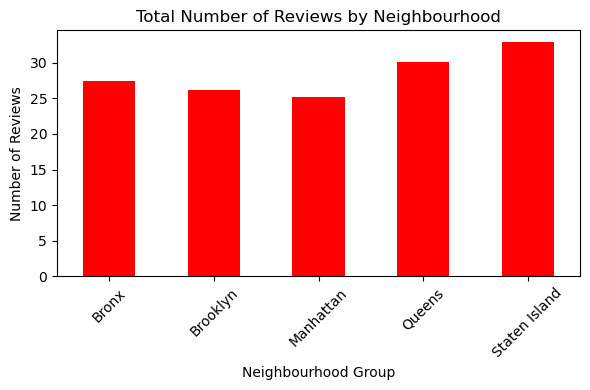

In [164]:
neigh_reviews = df.groupby('neighbourhood_group')['number_of_reviews'].mean()
neigh_reviews.plot(kind='bar', color='red', figsize=(6,4))

plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Reviews')
plt.title('Total Number of Reviews by Neighbourhood')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [141]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Brooklyn         17328
Manhattan        15992
Queens            5025
Bronx             1009
Staten Island      344
Name: count, dtype: int64

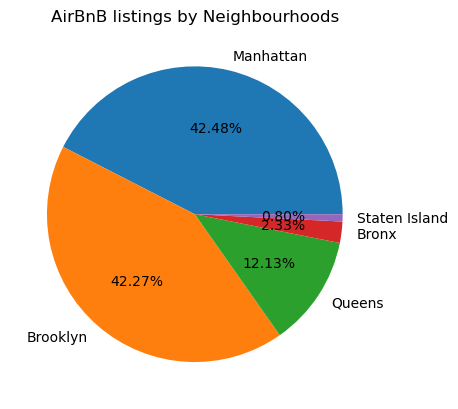

In [142]:
data = [19500, 19406, 5567, 1069, 365] 
label = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'] 
plt.title('AirBnB listings by Neighbourhoods')
plt.pie(data, labels=label, autopct='%.2f%%') 
plt.show()

In [143]:
df['room_type'].value_counts()

room_type
Private room       19845
Entire home/apt    18864
Shared room          989
Name: count, dtype: int64

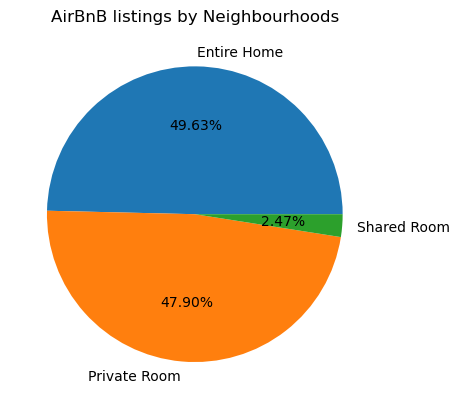

In [144]:
data = [22782, 21989, 1136] 
label = ['Entire Home', 'Private Room', 'Shared Room'] 
plt.title('AirBnB listings by Neighbourhoods')
plt.pie(data, labels=label, autopct='%.2f%%') 
plt.show()

## DISTRIBUTION OF PRICE

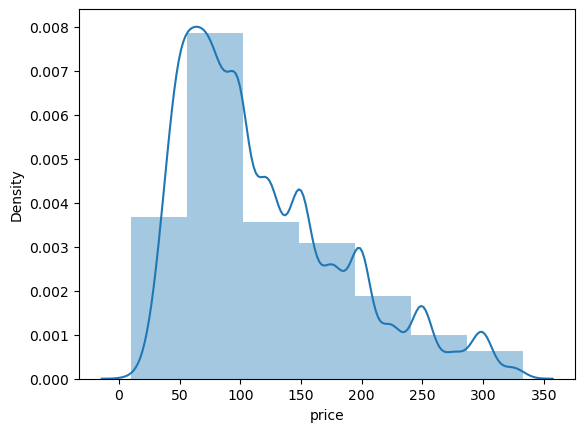

In [145]:
sns.distplot(df['price'], kde=True, bins=7)
plt.show()

In [146]:
df['price'].skew()

0.9604286218065825

In [147]:
df['price'].kurtosis()

0.26633103741159037

## IDENTIFYING CORRELATION BETWEEN VARIABLES IF ANY

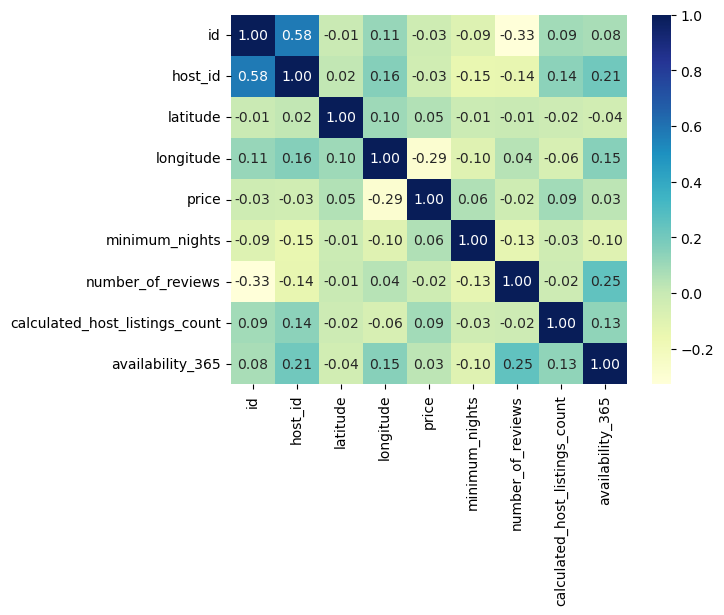

In [148]:
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()

<Axes: xlabel='price', ylabel='number_of_reviews'>

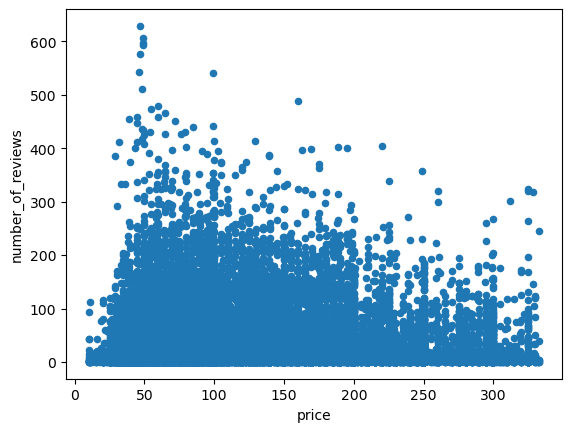

In [149]:
df.plot.scatter(x='price', y='number_of_reviews')

<Axes: xlabel='price', ylabel='availability_365'>

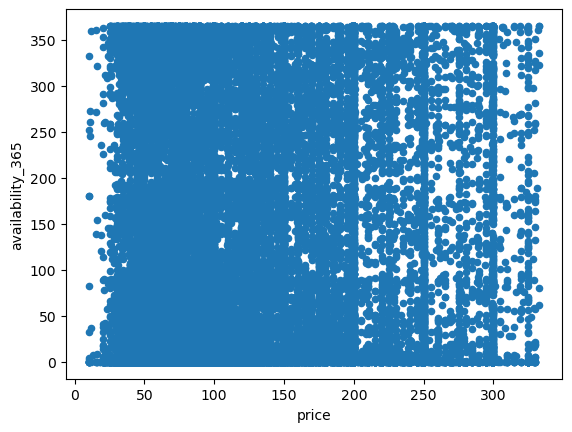

In [150]:
df.plot.scatter(x='price', y='availability_365')

## DISTRIBUTION OF LISTINGS & REVIEWS

In [151]:
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,6,365
1,2595,2845,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2,355
2,3647,4632,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,1,194
4,5022,7192,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,1,0


In [152]:
df['min_value'] = df['price'] * df['minimum_nights']
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,min_value
0,2539,2787,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,6,365,149
1,2595,2845,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2,355,225
2,3647,4632,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,1,365,450
3,3831,4869,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,1,194,89
4,5022,7192,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,1,0,800


<Axes: xlabel='min_value', ylabel='number_of_reviews'>

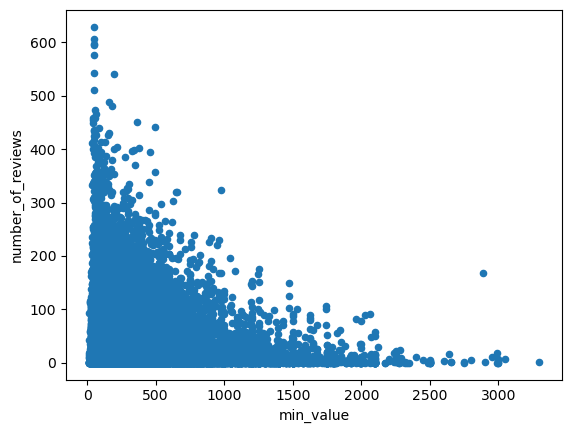

In [153]:
df.plot.scatter(x='min_value', y='number_of_reviews')

## LISTING & ENGAGEMENT

In [157]:
df1 = df.pivot_table(
    index=['host_id', 'neighbourhood_group'],
    values=['id', 'price', 'number_of_reviews', 'minimum_nights'],
    aggfunc={
        'id': 'count',
        'price': 'mean',
        'number_of_reviews': 'sum',
        'minimum_nights': 'mean'
    }
)

In [158]:
df1.head()

,,id,minimum_nights,number_of_reviews,price
host_id,neighbourhood_group,,,,
2571,Brooklyn,1,9.00,27,182.00
2787,Brooklyn,6,1.00,105,100.67
2845,Manhattan,2,1.00,46,162.00
2881,Brooklyn,2,2.00,390,58.50
3151,Brooklyn,1,1.00,1,69.00


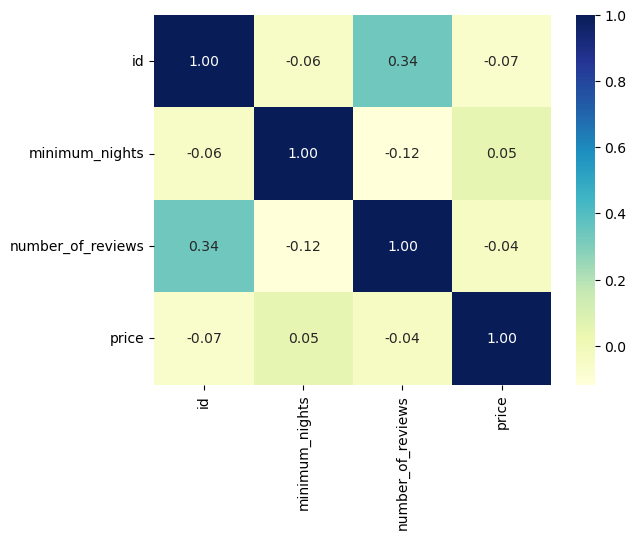

In [159]:
sns.heatmap(df1.corr(numeric_only=True), cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()